In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'

try:
    print("Iniciando a leitura dos dados do ISP...")
    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    df_ocorrencias = df_ocorrencias[['cisp', 'roubo_veiculo', 'recuperacao_veiculos']]

    df_total_roubo_recveiculos = df_ocorrencias.groupby('cisp').sum(['roubo_veiculo', 'recuperacao_veiculos']).reset_index()
    print(f"Total de roubos e recuperacoes de veiculos por CISP: {df_total_roubo_recveiculos.head()}")

except Exception as e:
    print(f"Erro ao baixar os dados: {e}")

Iniciando a leitura dos dados do ISP...
Total de roubos e recuperacoes de veiculos por CISP:    cisp  roubo_veiculo  recuperacao_veiculos
0     1            563                   535
1     4           2164                  1903
2     5           1315                  1543
3     6           4504                  7965
4     7           1996                  1821


In [2]:
try:
    print('Calculando a correlação')
    correlacao = np.corrcoef(df_total_roubo_recveiculos['roubo_veiculo'], df_total_roubo_recveiculos['recuperacao_veiculos'])[0, 1]
    print(f"A correlação entre roubos de veículos e recuperações é: {correlacao:.3f}")

except Exception as e:
    print(f"Erro ao calcular a correlação: {e}")

Calculando a correlação
A correlação entre roubos de veículos e recuperações é: 0.930


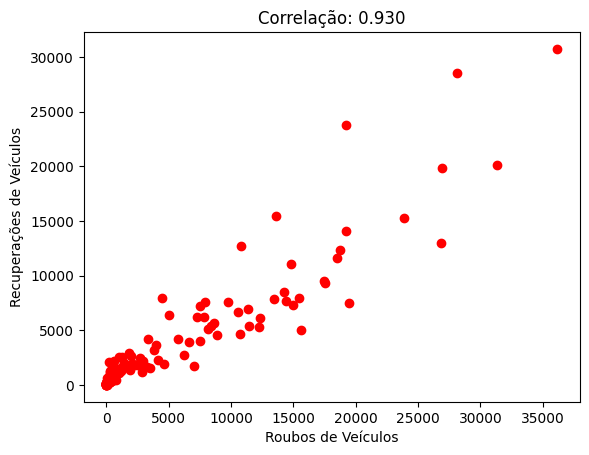

In [3]:
try:
    # gráfico de dispersão
    plt.scatter(df_total_roubo_recveiculos['roubo_veiculo'], df_total_roubo_recveiculos['recuperacao_veiculos'], color='red')
    plt.title(f'Correlação: {correlacao:.3f}')
    plt.xlabel('Roubos de Veículos')
    plt.ylabel('Recuperações de Veículos')
    #plt.xlim(0, df_total_roubo_recveiculos['roubo_veiculo'].max() * 1.1) # Ajusta o limite do eixo x
    #plt.ylim(0, df_total_roubo_recveiculos['recuperacao_veiculos'].max() * 1.1) # Ajusta o limite do eixo y
    #plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Erro ao criar o gráfico de dispersão: {e}")